In [1]:
import os

from jax.experimental.pallas.ops.tpu.example_kernel import double

os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'


import jax.numpy as jnp
import numpy as np
import plotly.io as pio
pio.renderers.default = "browser"

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp

import cbvf_reachability as cbvf

from dyn_sys.DoubleIntegrator import DoubleIntegrator
from controllers.CBVF_QP import CBVFQPController, find_safe_entry_time_efficient
from controllers.CBVFInterpolator import CBVFInterpolator
from utils.animator import create_trajectory_animation



In [2]:
dynamics = DoubleIntegrator(control_mode='max')

# limits of the grid in degrees
x1_lim = 7
x2_lim = 7


grid = cbvf.Grid.from_lattice_parameters_and_boundary_conditions(cbvf.sets.Box(np.array([-x1_lim, -x2_lim]),
                                                                           np.array([x1_lim, x2_lim])),
                                                                           (300, 300))
values_vi = -jnp.linalg.norm(grid.states[..., :2], axis=-1) + 5  # radius in radians

initial_values = -jnp.linalg.norm(grid.states[..., :2], axis=-1) + 5

times = np.linspace(0, -5, 10)

gamma = 0.5

In [3]:
solver_settings = cbvf.SolverSettings.with_accuracy("cbvf",
                                                  hamiltonian_postprocessor=cbvf.solver.identity,
                                                  gamma=gamma)
target_values = cbvf.solve_cbvf(solver_settings=solver_settings,
                                   dynamics=dynamics,
                                   grid=grid,
                                   times=times,
                                   initial_values=initial_values,
                                   target_values=values_vi,)
# solver_settings = cbvf.SolverSettings.with_accuracy(
#     "very_high",
#     hamiltonian_postprocessor=cbvf.solver.backwards_reachable_tube,
# )
# target_values = cbvf.solve(solver_settings, dynamics, grid, times, initial_values)

100%|##########|  5.0000/5.0 [00:03<00:00,  1.51sim_s/s]


<Figure size 640x480 with 0 Axes>

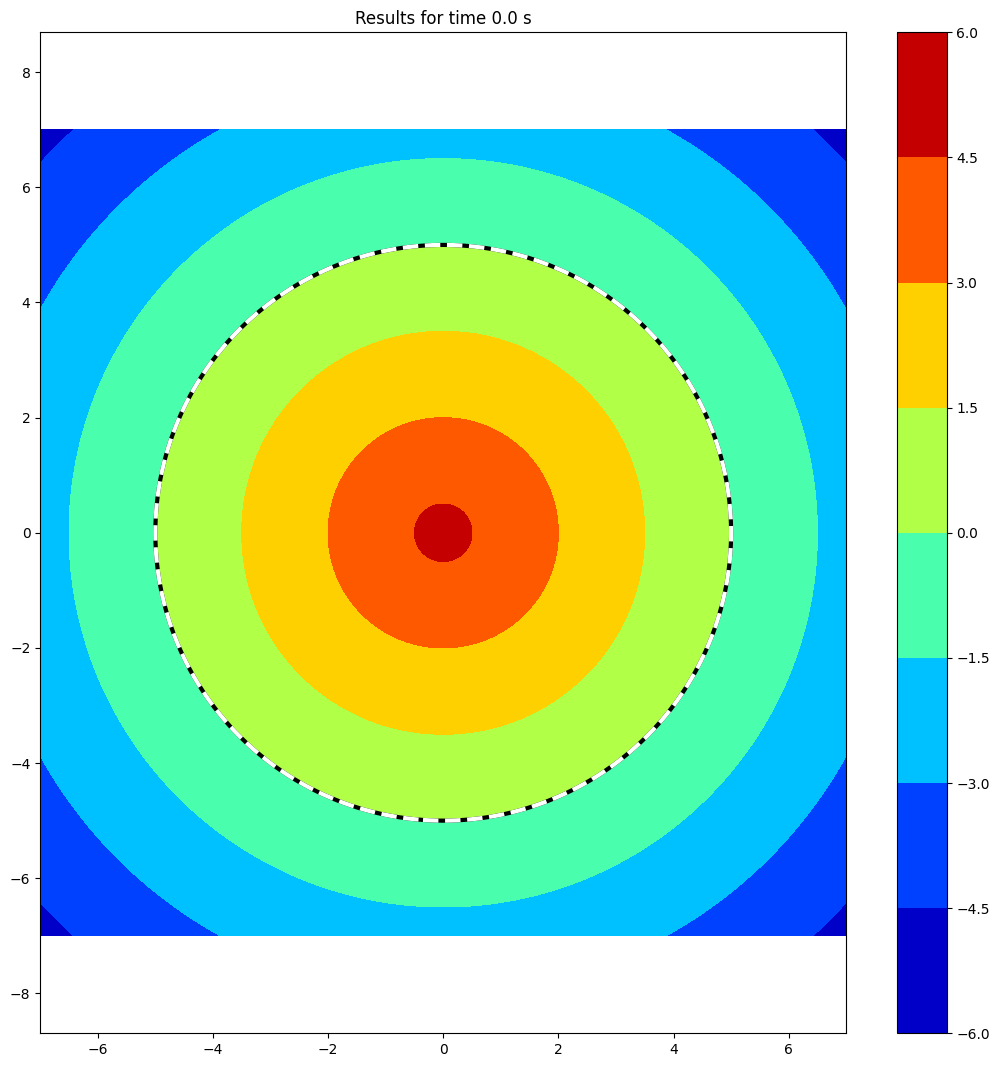

<Figure size 640x480 with 0 Axes>

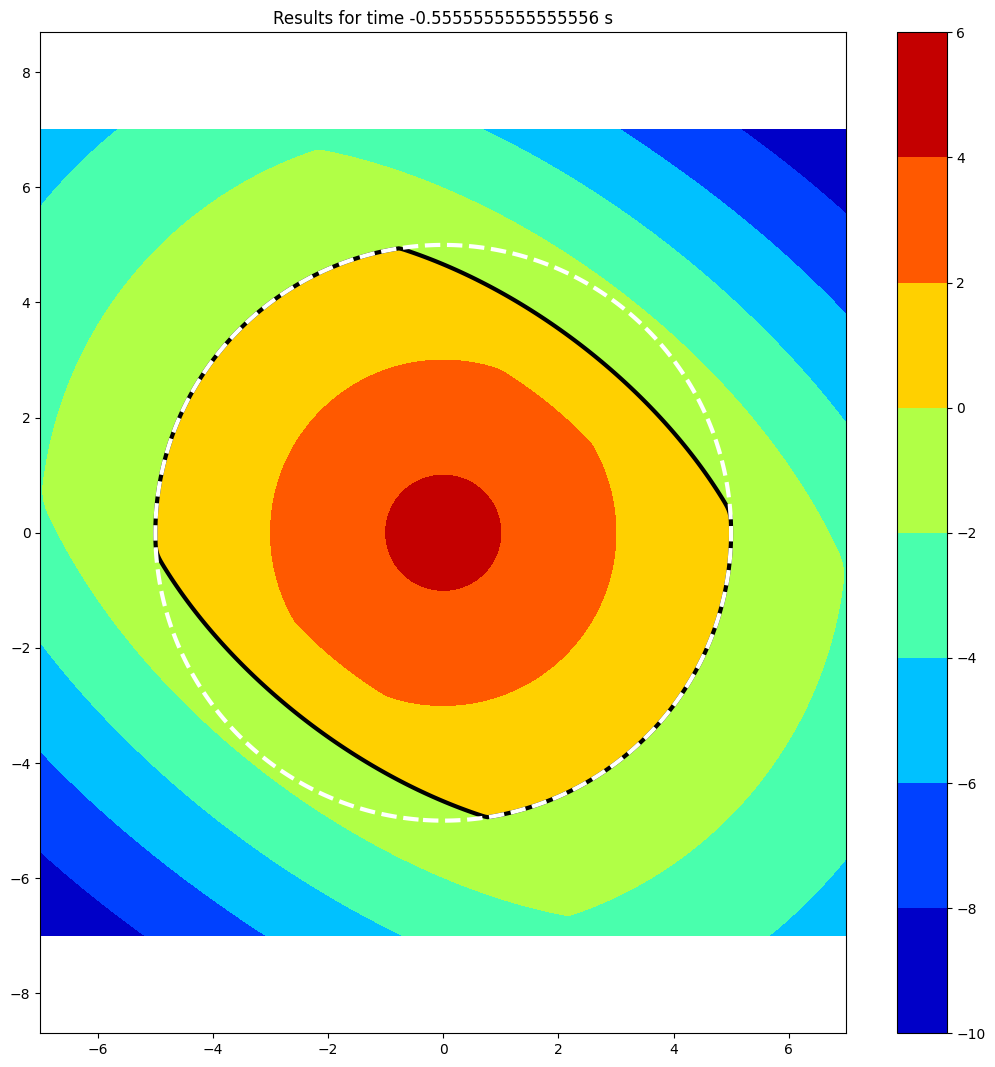

<Figure size 640x480 with 0 Axes>

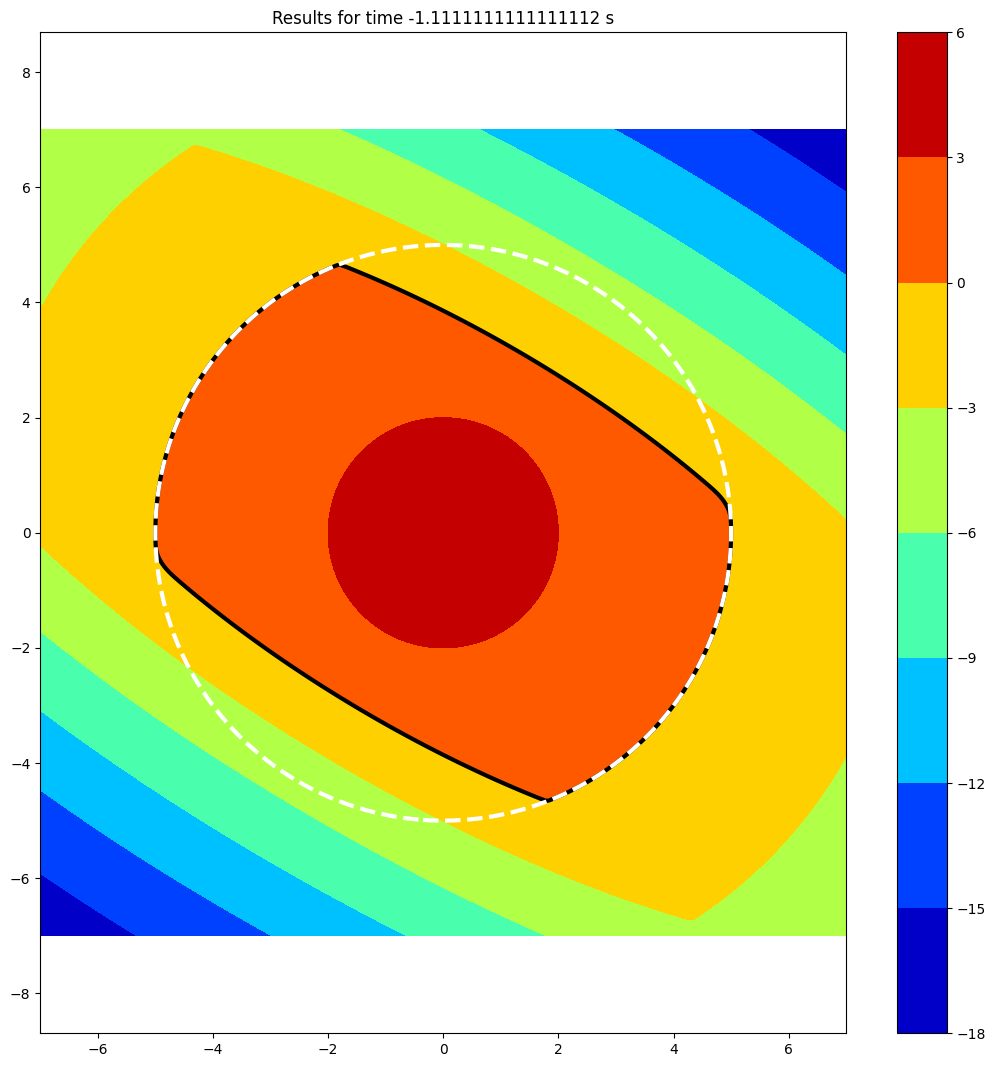

<Figure size 640x480 with 0 Axes>

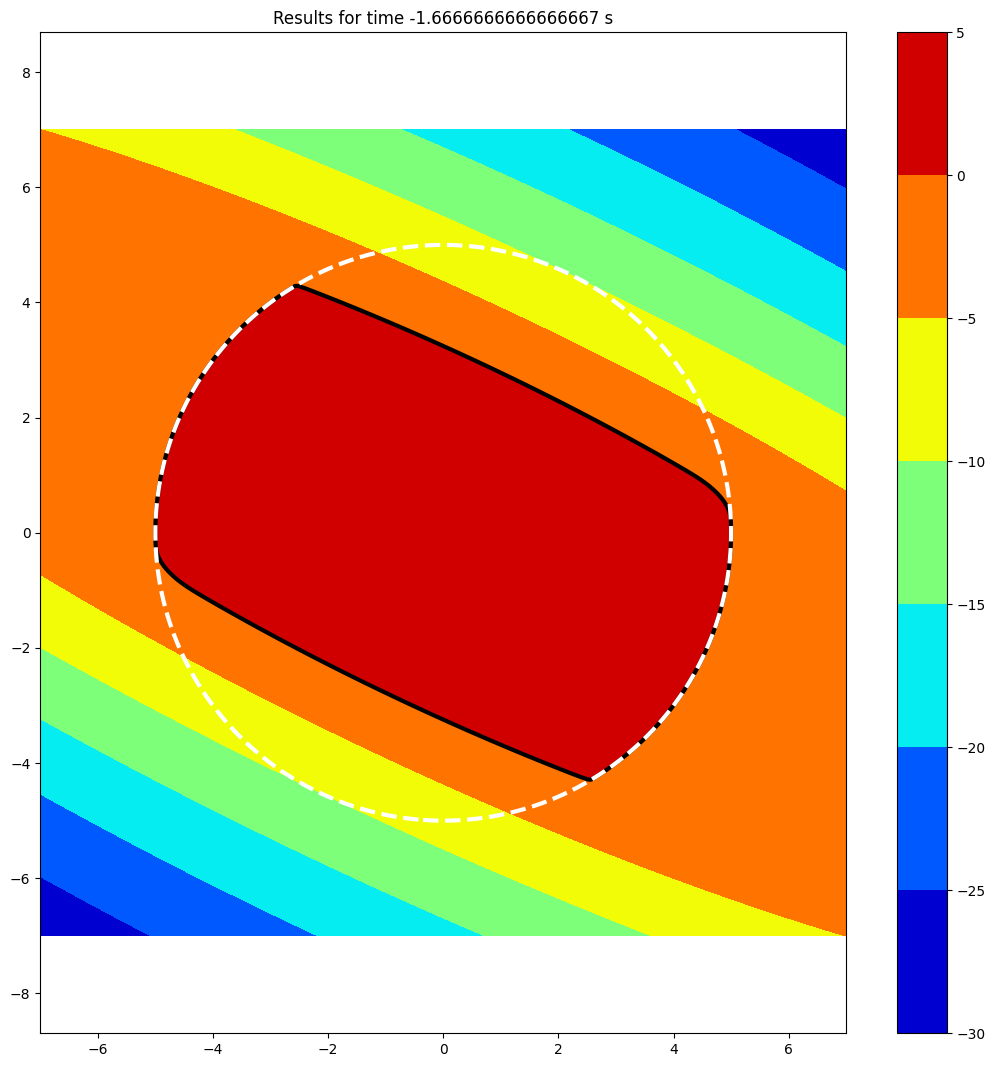

<Figure size 640x480 with 0 Axes>

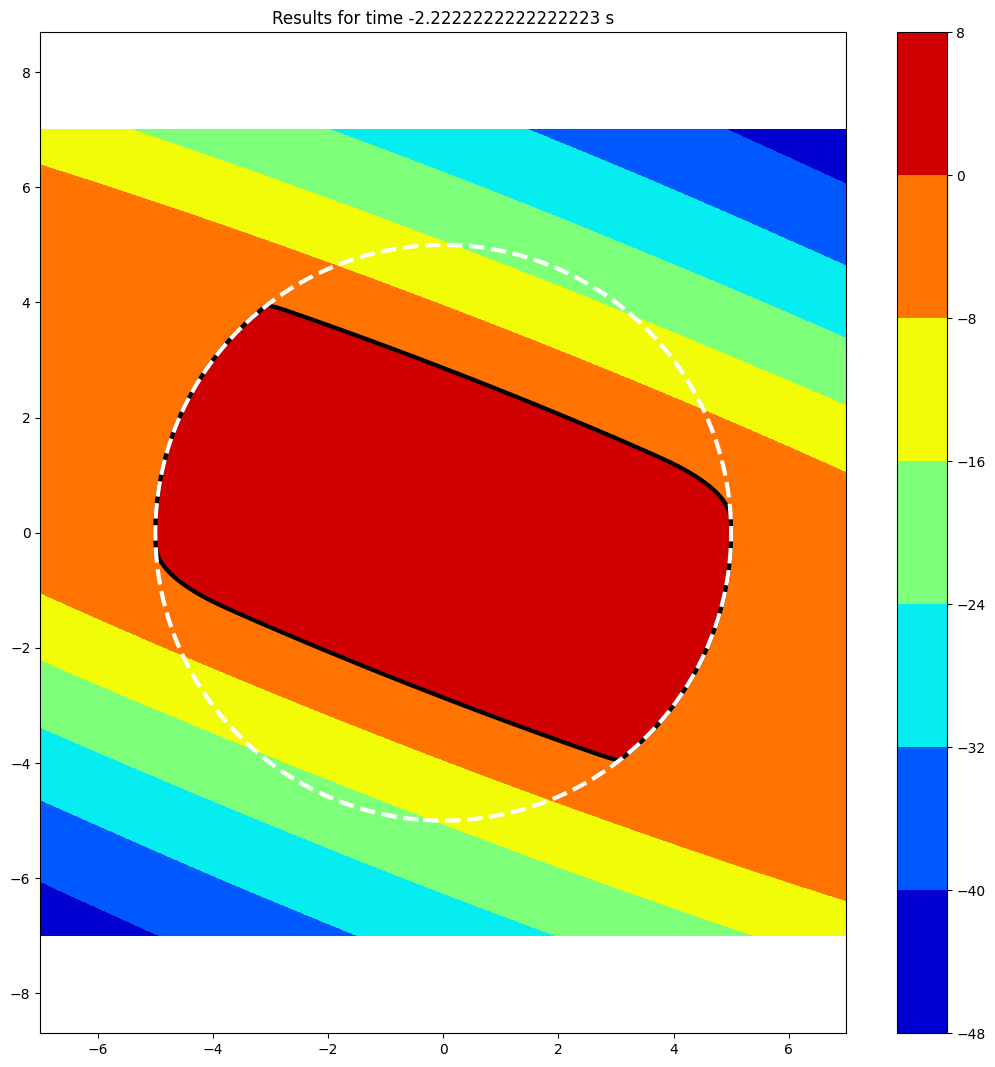

<Figure size 640x480 with 0 Axes>

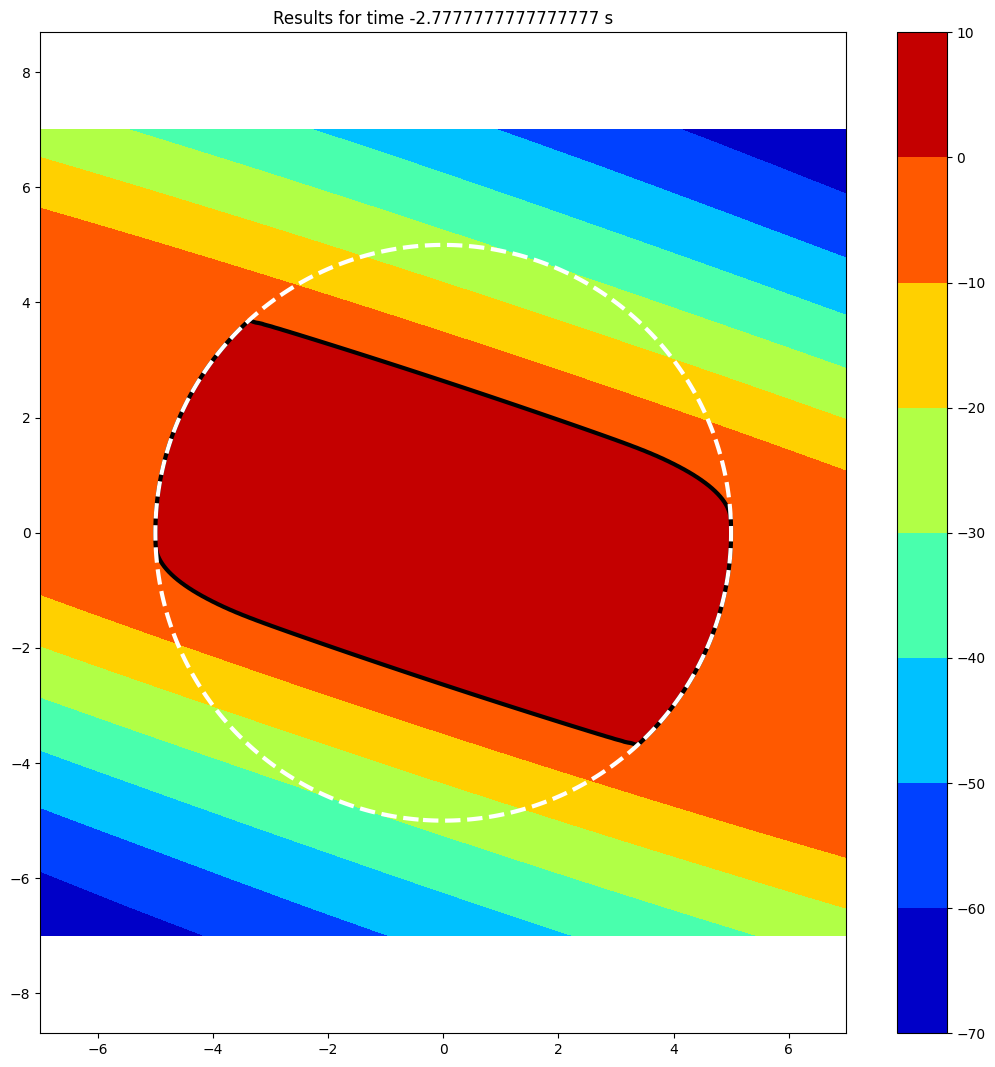

<Figure size 640x480 with 0 Axes>

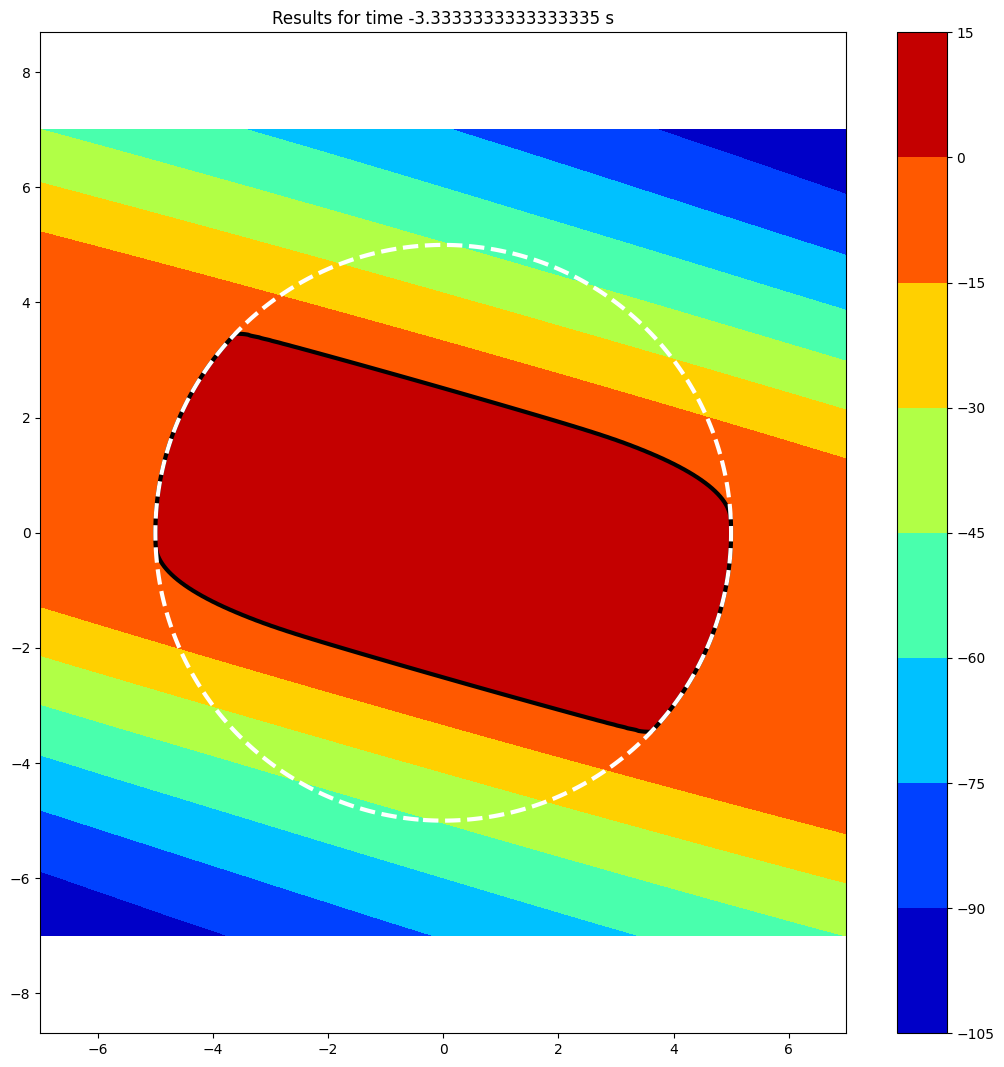

<Figure size 640x480 with 0 Axes>

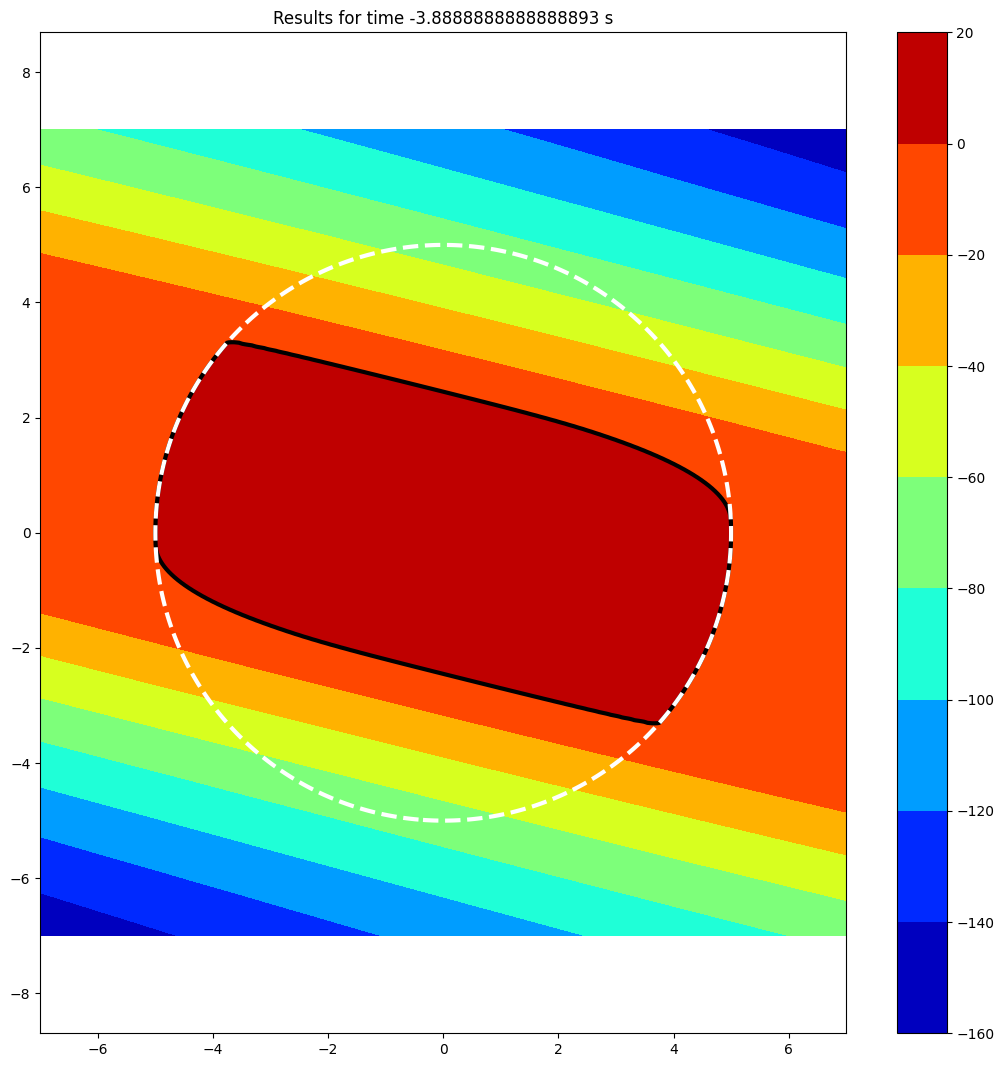

<Figure size 640x480 with 0 Axes>

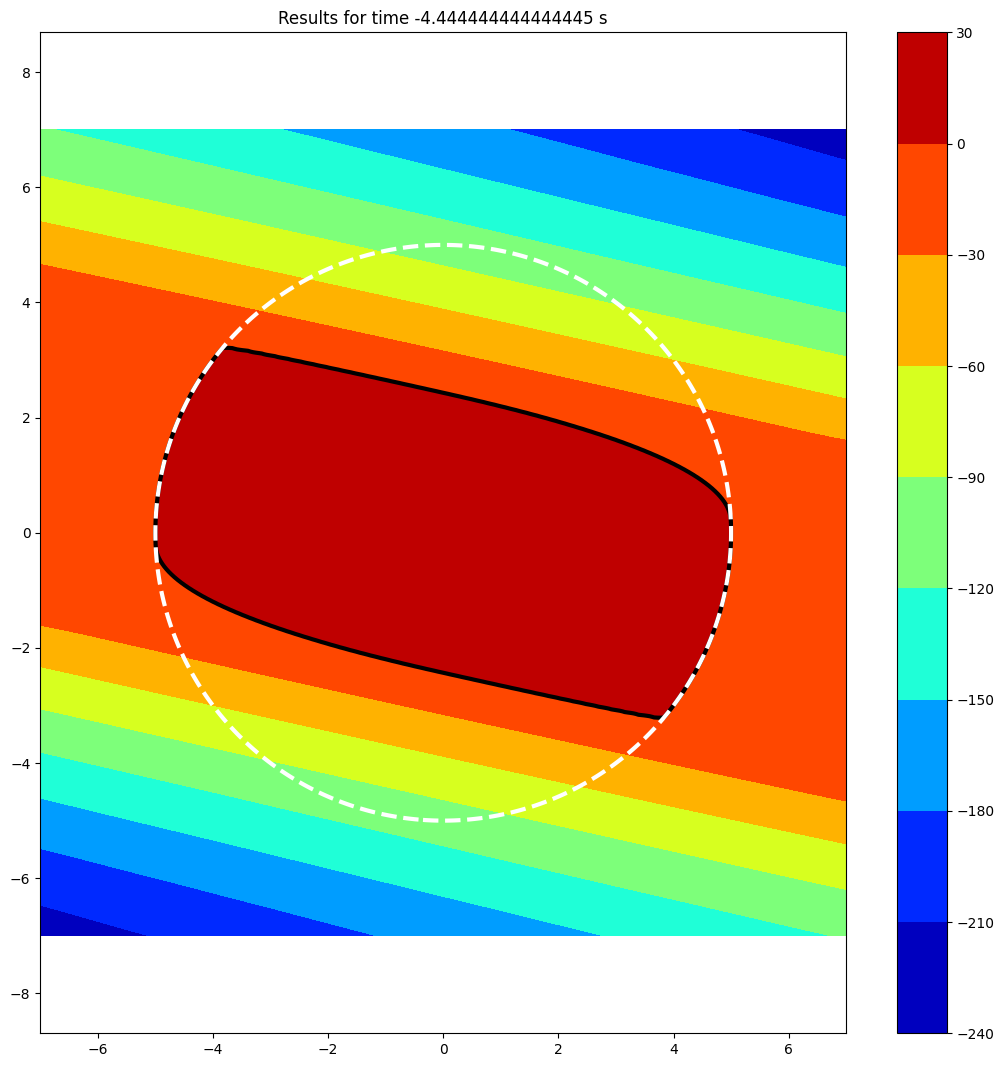

<Figure size 640x480 with 0 Axes>

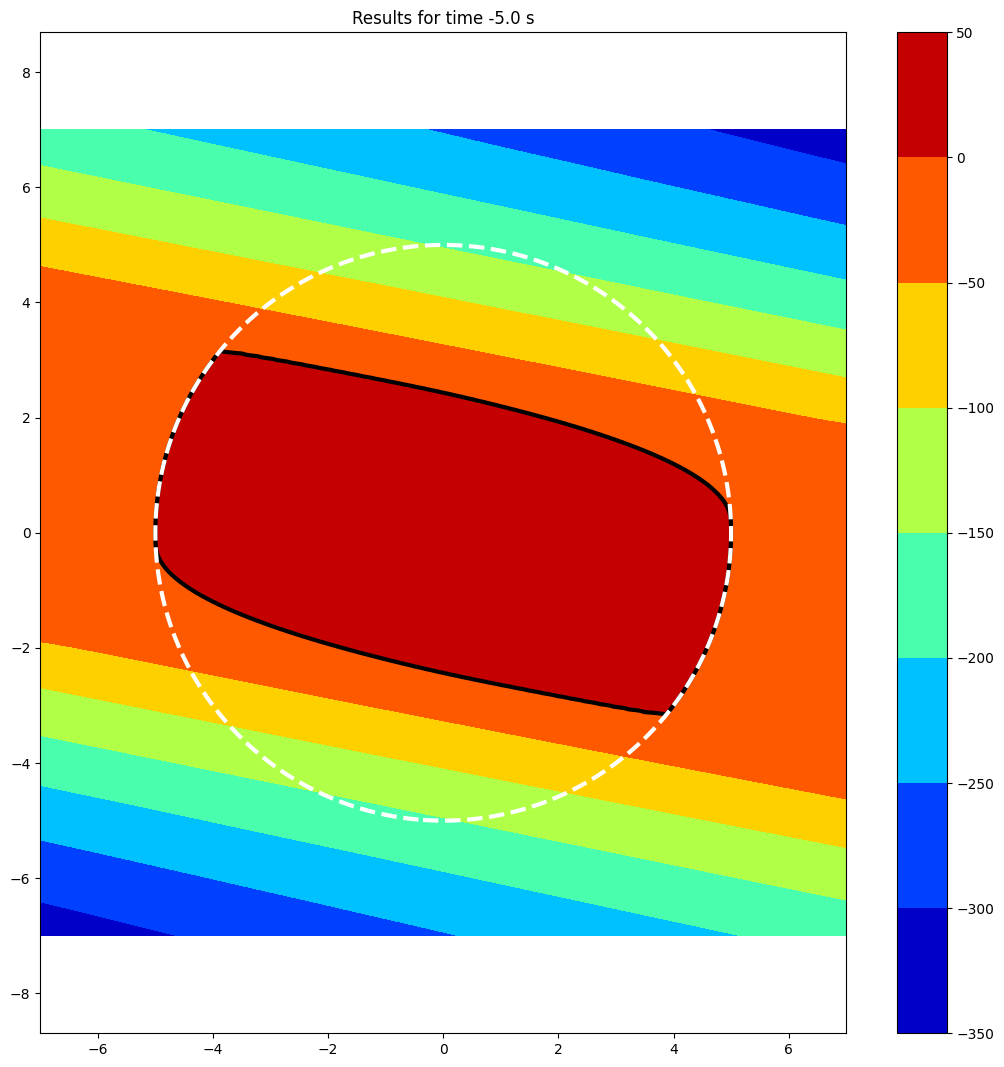

In [4]:
for i, time in enumerate(times):
    plt.jet()
    plt.figure(figsize=(13, 13))
    plt.contourf(grid.coordinate_vectors[0], grid.coordinate_vectors[1], target_values[i, :, :].T)
    plt.colorbar()
    plt.contour(grid.coordinate_vectors[0],
                grid.coordinate_vectors[1],
                target_values[i, :, :].T,
                levels=0,
                colors="black",
                linewidths=3)
    plt.contour(grid.coordinate_vectors[0],
                grid.coordinate_vectors[1],
                values_vi.T,
                levels=0,
                colors="white",
                linewidths=3,
                linestyles='--')
    plt.axis('equal')
    plt.title(f"Results for time {time} s")
    plt.show()



In [8]:
f = go.Figure(data=go.Surface(z=target_values[9, :, :].T,
                                         x=grid.coordinate_vectors[0],
                                         y=grid.coordinate_vectors[1],
                                         colorscale="Jet",
                                         contours={
                                             "z": {
                                                 "show": True,
                                                 "start": 0.00,
                                                 "end": 0.00,
                                                 "size": 1
                                             }
                                         }))
f.update_layout(title=f"CBVF Double Integrator with gamma {gamma}",
                  scene=dict(xaxis_title="x1",
                             yaxis_title="x2",
                             zaxis_title="value",
                             xaxis=dict(range=[-x1_lim, x1_lim]),
                             yaxis=dict(range=[-x2_lim, x2_lim]),
                             zaxis=dict(range=[0, 6])),
                  width=800,
                  height=800,
                  scene_aspectmode='cube')
f.show()

In [ ]:
x_init = np.array([3, -1])
target = np.array([-4, -1])

k_p = 1
k_d = 1